In [110]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal as sig

In [111]:
imgBGR = cv2.imread("emma.jpg")

In [112]:
img = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

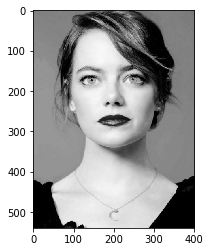

In [113]:
plt.imshow(img)

## cv2 Canny Edge Detection in-built function

In [114]:
edges = cv2.Canny(img,100,200)

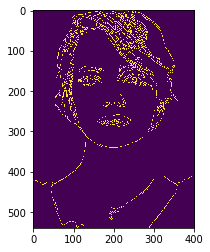

In [115]:
plt.imshow(edges)

## Canny Edge Detection Implementation

### Noise Reduction

In [116]:
m,n=gray.shape

In [117]:
img_blur=cv2.GaussianBlur(gray, (5,5),0)

### Intensity Gradient of Image - Sobel filtering

In [118]:
sobel_filter = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
I_x = sig.convolve2d(img_blur,sobel_filter,mode='same')
I_y = sig.convolve2d(img_blur,np.flip(sobel_filter.T, axis=0),mode='same')

In [119]:
theta=np.arctan2(I_y,I_x)

In [120]:
grad = (I_x**2+I_y**2)**0.5
grad = grad*255/grad.max()

### Non-max suppression

In [121]:
img_nms = np.zeros(grad.shape)
theta_r=theta*180/np.pi
# theta_r[theta_r<0]+=180
for i in range(len(theta_r)):
    for j in range(len(theta_r[i])):
        if theta_r[i][j]<0:
            theta_r[i][j]+=180

In [122]:
for i in range(1,m-1):
    for j in range(1,n-1):
        b,a=255,255    
        if (0 <= theta_r[i,j] < 22.5) or (157.5 <= theta_r[i,j] <= 180):
            b,a = grad[i, j-1],grad[i, j+1]
        elif (22.5 <= theta_r[i,j] < 67.5):
            b,a = grad[i+1, j-1], grad[i-1, j+1]
        elif (67.5 <= theta_r[i,j] < 112.5):
            b,a = grad[i-1, j],grad[i+1, j]
        elif (112.5 <= theta_r[i,j] < 157.5):
            b,a = grad[i-1, j-1],grad[i+1, j+1]
        
        if (grad[i,j] >= b) and (grad[i,j] >= a):
            img_nms[i,j] = grad[i,j]
        else:
            img_nms[i,j] = 0

### Hysteresis Thresholding

In [123]:
T_low_r=0.05
T_high_r=0.09

In [124]:
T_high = T_high_r*img_nms.max()
T_low = T_low_r*img_nms.max()

In [125]:
img_thresh = np.zeros(img_nms.shape)
high_val =255
low_val=20
high_i,high_j=np.where(img_nms>=T_high)
low_i,low_j=np.where((img_nms<=T_high)&(img_nms>=T_low))
img_thresh[high_i,high_j]=high_val
img_thresh[low_i,low_j]=low_val


### Edge Linking

In [126]:
for i in range(1,m-1):
    for j in range(1,n-1):
        if (img_thresh[i,j]==low_val):
            if ((img_thresh[i+1, j-1] == high_val) or (img_thresh[i+1, j] == high_val) or (img_thresh[i+1, j+1] == high_val)
                or (img_thresh[i, j-1] == high_val) or (img_thresh[i, j+1] == high_val)
                or (img_thresh[i-1, j-1] == high_val) or (img_thresh[i-1, j] == high_val) or (img_thresh[i-1, j+1] == high_val)):
                img_thresh[i, j] = high_val
            else:
                img_thresh[i, j] = 0

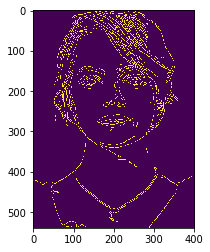

In [127]:
plt.imshow(img_thresh)